<a href="https://colab.research.google.com/github/zainabQuadri/Data-Science/blob/main/excelrprojectk-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


HEAD:
   Birth Rate Business Tax Rate  CO2 Emissions       Country  \
0       0.020               NaN        87931.0       Algeria   
1       0.050               NaN         9542.0        Angola   
2       0.043               NaN         1617.0         Benin   
3       0.027               NaN         4276.0      Botswana   
4       0.046               NaN         1041.0  Burkina Faso   

   Days to Start Business  Ease of Business  Energy Usage              GDP  \
0                     NaN               NaN       26998.0  $54,790,058,957   
1                     NaN               NaN        7499.0   $9,129,594,819   
2                     NaN               NaN        1983.0   $2,359,122,303   
3                     NaN               NaN        1836.0   $5,788,311,645   
4                     NaN               NaN           NaN   $2,610,959,139   

   Health Exp % GDP Health Exp/Capita  ...  Life Expectancy Male  \
0             0.035               $60  ...                  67.0   
1  

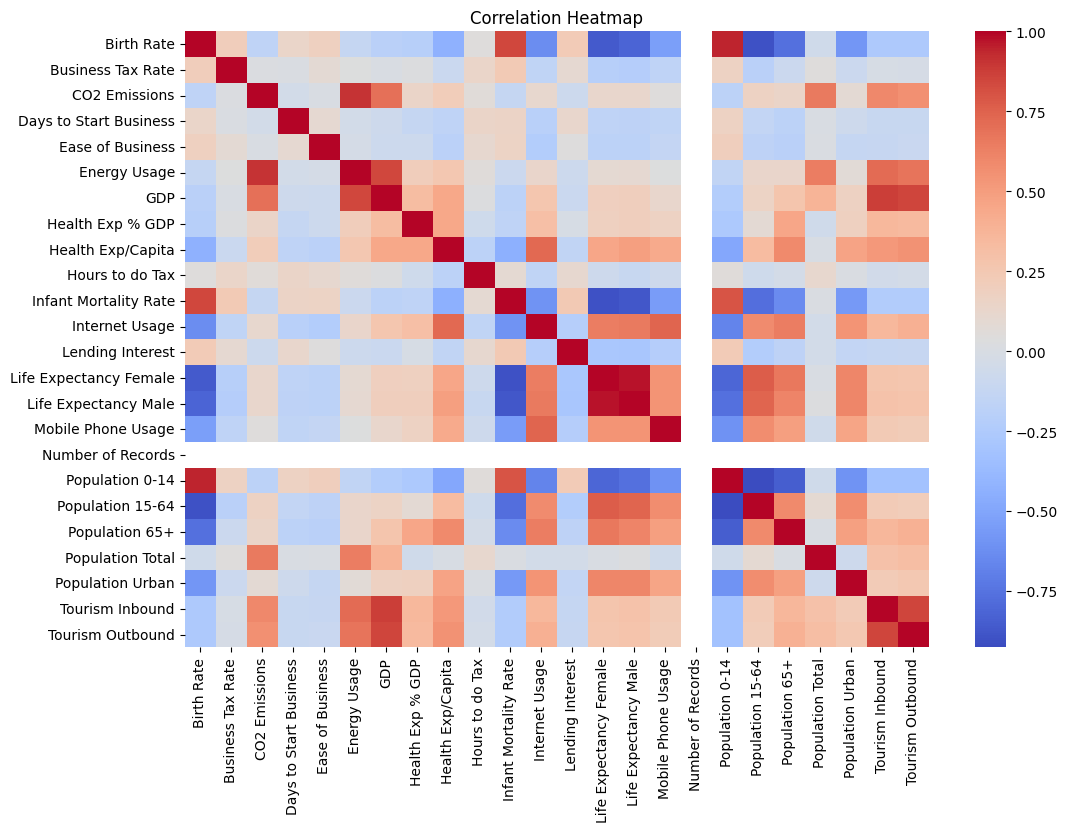

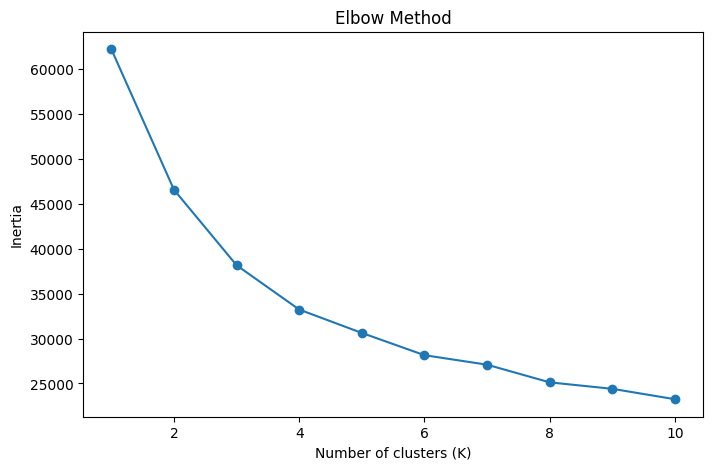


Clustered Data:
        Country  Cluster
0       Algeria        2
1        Angola        2
2         Benin        2
3      Botswana        2
4  Burkina Faso        2


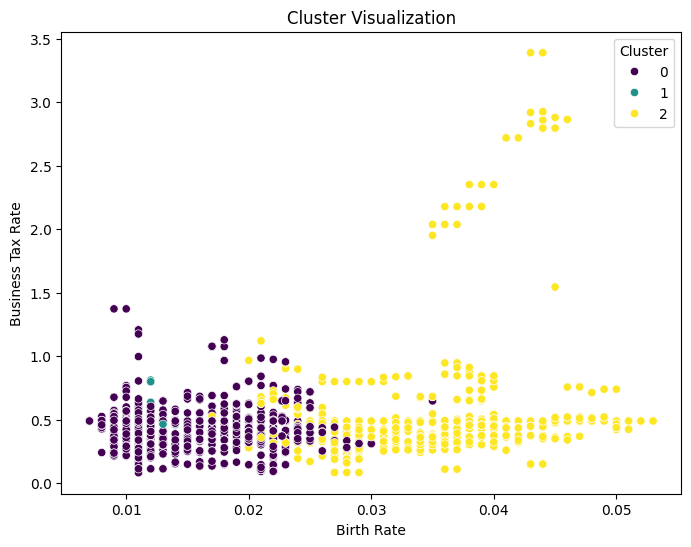

In [2]:
# ===============================
# 1. Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

# ===============================
# 2. Load Dataset
# ===============================
df = pd.read_excel("World_development_mesurement (2).xlsx")
df.head()

#Select numerical features only
num_cols = df.select_dtypes(include=np.number).columns
df_num = df[num_cols]

# ===============================
# 3. Basic EDA
# ===============================

# View first rows
print("\nHEAD:")
print(df.head())

# Check missing values
print("\nMISSING VALUES:")
print(df.isnull().sum())

# Data types
print("\nDATA TYPES:")
print(df.dtypes)

# Summary statistics
print("\nSUMMARY STATISTICS:")
print(df.describe())

# ===============================
# 4. Data Cleaning and Type Conversion
# ===============================

# Convert 'Business Tax Rate' to numeric, handling percentage sign
df['Business Tax Rate'] = df['Business Tax Rate'].astype(str).str.replace('%', '', regex=False)
df['Business Tax Rate'] = pd.to_numeric(df['Business Tax Rate'], errors='coerce') / 100  # Convert percentage to decimal

# Convert columns with '$' and ',' to numeric
for col in ['GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound']:
    # Ensure the column is string type before applying string operations
    df[col] = df[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')


# ===============================
# 5. Handle Missing Values
# ===============================
df = df.fillna(df.mean(numeric_only=True))

# ===============================
# 6. Select Numerical Columns
# ===============================
num_cols = df.select_dtypes(include=np.number).columns
df_num = df[num_cols]

# ===============================
# 7. Correlation Analysis
# ===============================
plt.figure(figsize=(12,8))
sns.heatmap(df_num.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ===============================
# 8. Standardize Data
# ===============================
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_num)

# ===============================
# 9. Elbow Method to find optimal K
# ===============================
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.show()



# ===============================
# 10. Perform Final K-Means
# ===============================
k = 3  # change based on elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)


# ===============================
# 11. Show Clustered Dataset
# ===============================
print("\nClustered Data:")
print(df[['Country', 'Cluster']].head())

#view the result
df[['Country', 'Cluster']].head()


# ===============================
# 12. Visualize Clusters (using 2 features)
# ===============================
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df_num.iloc[:,0],
    y=df_num.iloc[:,1],
    hue=df['Cluster'],
    palette='viridis'
)
plt.xlabel(df_num.columns[0])
plt.ylabel(df_num.columns[1])
plt.title("Cluster Visualization")
plt.show()